In [3]:
import sys 
sys.path.append('..')
import alpenglow.files as af
import skimage.external.tifffile as tiff
from skimage.io import imread_collection, ImageCollection
from skimage import transform
from skimage import img_as_int
from skimage import data
from skimage.transform import swirl
import skimage as skimage
import numpy as np
import shutil as sh
import os
import os.path as op
import tempfile
import boto3
from scipy import optimize
import alpenglow.stitching as ast
from imp import reload
from alpenglow.stitching import stitch, find_shift, apply_shift, calc_coef, output_zstack, stitch_zstack
import alpenglow.stitching2 as ast2
from alpenglow.stitching2 import stitch, find_shift, apply_shift, calc_coef, output_zstack, stitch_zstack

# creating synthetic imaging datasets
camera = data.camera()
camera_invert = skimage.util.invert(camera)

# two channel imaging dataset
# creates 10 images in z-stack, crisp to blurry with increasing n
intervals = np.linspace(0.0,3.0,num=10)
tdir = tempfile.TemporaryDirectory()
for z in range(1,11):
    for number in intervals:
        image = (skimage.filters.gaussian(camera, number)*255).astype('uint8')
        image_invert = (skimage.filters.gaussian(camera_invert, number)*255).astype('uint8')
        strip1 = image[50:200]
        strip2 = image[150:300]
        strip3 = image[250:400]
        strip1_invert = image_invert[50:200]
        strip2_invert = image_invert[150:300]
        strip3_invert = image_invert[250:400]
        strip1 = np.pad(strip1, ((0,0),(0,38)), 'constant', constant_values=(0))
        strip2 = np.pad(strip2, ((0,0),(38,0)), 'constant', constant_values=(0))
        strip3 = np.pad(strip3, ((0,0),(19,19)), 'constant', constant_values=(0))
        strip1_invert = np.pad(strip1_invert, ((0,0),(0,38)), 'constant', constant_values=(0))
        strip2_invert = np.pad(strip2_invert, ((0,0),(38,0)), 'constant', constant_values=(0))
        strip3_invert = np.pad(strip3_invert, ((0,0),(19,19)), 'constant', constant_values=(0)) 
        camera_2chan_strip1 = np.vstack((strip1, strip1_invert))
        camera_2chan_strip2 = np.vstack((strip2, strip2_invert))
        camera_2chan_strip3 = np.vstack((strip3, strip3_invert))
        z = int(number*3+1)
        tiff.imsave(op.join(tdir.name, "camera_2chan_strip1_z%01d.tif" % z) , camera_2chan_strip1)
        tiff.imsave(op.join(tdir.name, "camera_2chan_strip2_z%01d.tif" % z) , camera_2chan_strip2)
        tiff.imsave(op.join(tdir.name, "camera_2chan_strip3_z%01d.tif" % z) , camera_2chan_strip3)


In [6]:
images1= imread_collection(op.join(tdir.name, "camera_2chan_strip1_z*"))
images2= imread_collection(op.join(tdir.name, "camera_2chan_strip2_z*"))
images3= imread_collection(op.join(tdir.name, "camera_2chan_strip3_z*"))

In [7]:
mosaic_12 = ast2.stitch_zstack(images2, images1, 1, 0, 30, current_stack=None, out_path=None)
mosaic_123 = ast2.stitch_zstack(images3, mosaic_12, 1, 0, 30, current_stack=None, out_path=None)

ValueError: could not broadcast input array from shape (540,550) into shape (539,550)

In [13]:
mosaic_12 = ast2.stitch_zstack(images2, images1, 2, 0, 30, current_stack=None, out_path=None)

AttributeError: 'ImageCollection' object has no attribute 'shape'

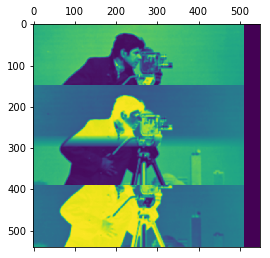

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(mosaic_12[4])